# Hexagonal Heatmap

In [1]:
import pandas as pd

from lets_plot import *


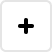
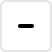
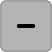
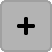
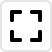
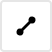
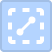
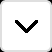
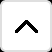
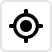
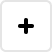
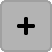
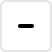
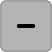
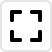
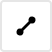
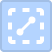
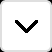
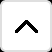
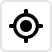

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/diamonds.csv")
print(df.shape)
df.head()

(53940, 10)


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## Default View

In [4]:
p = ggplot(df, aes("carat", "price")) + coord_cartesian()

In [5]:
p + geom_hex()

### Parameters

In [6]:
p + geom_hex(bins=[5, 10]) + ggtitle("bins=[5, 10]")

In [7]:
p + geom_hex(binwidth=[1, 5000]) + ggtitle("binwidth=[1, 5000]")

In [8]:
p + geom_hex(binwidth=[1, 5000], drop=False) + ggtitle("drop=False")

#### Dimension units

With some data, hexagons may not fit into the hexagonal grid and may overlap:

In [9]:
data = {
    'x': [0, 1, 9, 10],
    'y': [0, 19, 1, 0],
}

ggplot(data, aes('x', 'y')) + \
    geom_hex(binwidth=[10, 10], size=.5) + \
    geom_point(color="red")

A possible solution is to change the size units to `'identity'` and specify `width`/`height` as in `binwidth`:

In [10]:
ggplot(data, aes('x', 'y')) + \
    geom_hex(binwidth=[10, 10], size=.5,
             width_unit='identity', width=10,
             height_unit='identity', height=10) + \
    geom_point(color="red")

## `'binhex'` Stat

In [11]:
ggplot(df, aes("carat", "price")) + \
    geom_point(aes(color='..count..'), stat='binhex',
               binwidth=[1, 5000], drop=False,
               size=.75, size_unit='x') + \
    coord_cartesian(xlim=[-1, 7], ylim=[-2_500, 25_000])

## Hexagons on Map

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/italy_cdi.csv")\
    [["CDI", "No. of responses", "Latitude", "Longitude"]]
df.columns = ["CDI", "number_of_responses", "lat", "lon"]
print(df.shape)
df.head()

(27, 4)


CDI  number_of_responses    lat    lon
0  3.1                    1  42.37  14.07
1  2.2                    1  42.25  14.37
2  2.0                    1  42.20  14.21
3  3.1                    1  42.22  14.28
4  3.4                    4  42.46  14.21

In [13]:
ggplot(df) + \
    geom_livemap(location=[15, 41], zoom=7) + \
    geom_hex(aes(x="lon", y="lat", weight="number_of_responses", fill="..count.."),
             binwidth=[.5, .5], size=.5, color="#081d58", alpha=.5) + \
    scale_fill_brewer(name="Number of responses", type='seq', palette="YlGnBu") + \
    ggtitle("Community Internet Intensity Map",
            "M 4.7 - 1 km NW of Montagano, Italy") + \
    theme(plot_title=element_text(face='bold'))